In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set()

In [5]:
# Get data - covid info from NYT and zip code to county code (FIP) mapping from HUD
# HUD: https://www.huduser.gov/portal/datasets/usps_crosswalk.html
# NYT: https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv

zips_and_fips = pd.read_csv('zip-to-fips.csv')
og_data = pd.read_csv('nyt-covid-7-8.csv')
# Note that ~30% of counties are missing from NYT covid data!

In [15]:
og_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [17]:
og_data['fullname'] = og_data['county'] + ' County, ' + og_data['state']

In [6]:
zipcode = 94022
# zips_and_fips[zips_and_fips['ZIP'] == zipcode]
zips_and_fips.loc[zips_and_fips.ZIP == zipcode,'COUNTY']

51278    6085
Name: COUNTY, dtype: int64

In [11]:
zips_and_fips.dtypes

ZIP       int64
COUNTY    int64
dtype: object

In [19]:
zip_to_fips(10001)

36061

In [13]:
# Get data - covid info from NYT and zip code to county code (FIP) mapping from HUD
# HUD: https://www.huduser.gov/portal/datasets/usps_crosswalk.html
# NYT: https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv

zips_and_fips = pd.read_csv('zip-to-fips.csv')
og_data = pd.read_csv('nyt-covid-7-8.csv')
# Note that ~30% of counties are missing from NYT covid data!

def zip_to_fips(zipcode):
    
    fip = zips_and_fips[zips_and_fips['ZIP'] == zipcode].iloc[0]['COUNTY']
    
    return fip

def get_county_data(my_fips):
    my_data = og_data[og_data.fips == my_fips]
    
    county_name = my_data['county'].unique()
    
    if len(county_name) > 1:
        raise ValueError('something is wrong - found more than one matching county')
    
    my_filtered_data = my_data[['date', 'cases', 'deaths']]
    
    
    return {
        'county': county_name[0],
        'data': my_filtered_data
    }

def zip_to_data(zip):
    """Returns dict with two values: 'county' has the name of the county, 'data' has a df with
    date, cases to date, and deaths to date"""
    
    fips = zip_to_fips(zip)
    data = get_county_data(fips)
    
    return data

zip_code = 94022

result = zip_to_data(zip_code)
county_name = result['county']
county_data = result['data']

In [22]:
zip_to_fips(10010)

36061

In [24]:
og_data[og_data.fips == 36061]

,date,county,state,fips,cases,deaths,fullname


In [25]:
og_data[og_data['state'] == 'New York']

,date,county,state,fips,cases,deaths,fullname
416,2020-03-01,New York City,New York,NaN,1,0,"New York City County, New York"
448,2020-03-02,New York City,New York,NaN,1,0,"New York City County, New York"
482,2020-03-03,New York City,New York,NaN,2,0,"New York City County, New York"
518,2020-03-04,New York City,New York,NaN,2,0,"New York City County, New York"
519,2020-03-04,Westchester,New York,36119.0,9,0,"Westchester County, New York"
...,...,...,...,...,...,...,...
309009,2020-07-08,Washington,New York,36115.0,247,11,"Washington County, New York"
309010,2020-07-08,Wayne,New York,36117.0,193,1,"Wayne County, New York"
309011,2020-07-08,Westchester,New York,36119.0,35153,1563,"Westchester County, New York"
309012,2020-07-08,Wyoming,New York,36121.0,98,3,"Wyoming County, New York"


In [ ]:
zip_code = 94022

result = zip_to_data(zip_code)
county_name = result['county']
county_data = result['data']

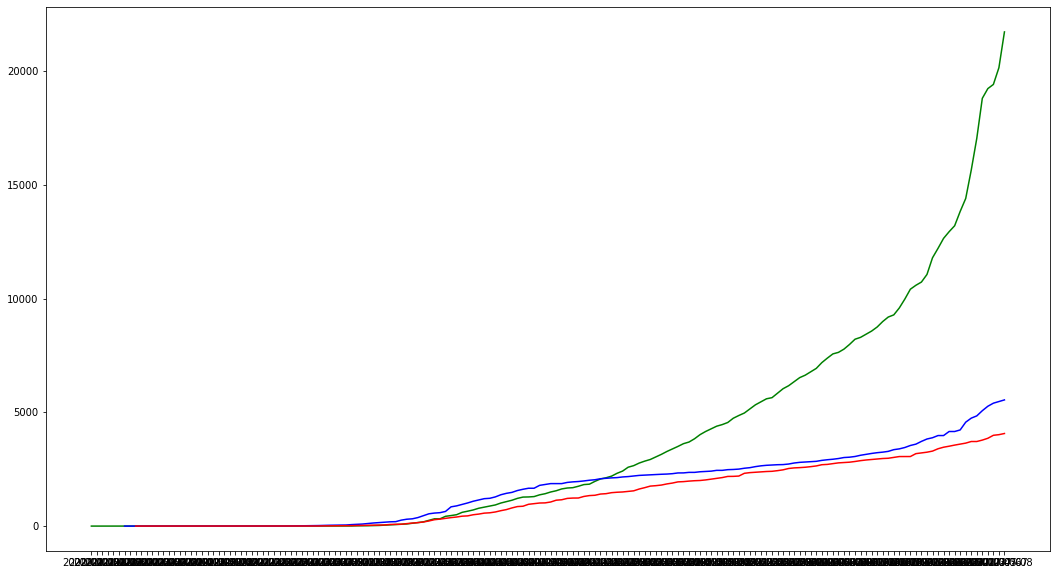

In [14]:
santa_clara = zip_to_data(94022)['data']
san_francisco = zip_to_data(94114)['data']
orange_county = zip_to_data(92646)['data']
tulsa = zip_to_data(74133)['data']


plt.figure(figsize=(18, 10))
plt.plot(orange_county['date'], orange_county['cases'], color='green')
plt.plot(santa_clara['date'], santa_clara['cases'], color='blue')
plt.plot(san_francisco['date'], san_francisco['cases'], color='red')
plt.show()